In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import linear_model
import re 
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
# from lofo import LOFOImportance, Dataset, plot_importance
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import svm
import warnings
# warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_columns", 101)

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2612 non-null   int64  
 1   institution_name    2612 non-null   object 
 2   institution_type    2612 non-null   object 
 3   charter_type        2612 non-null   object 
 4   headquarters        2612 non-null   object 
 5   latitude            2612 non-null   float64
 6   longitude           2612 non-null   float64
 7   failure_date        2612 non-null   object 
 8   insurance_provider  2612 non-null   object 
 9   failure_outcome     2612 non-null   object 
 10  total_deposits      2370 non-null   float64
 11  total_assets        2456 non-null   float64
 12  liquidity           2491 non-null   float64
 13  estimated_loss      2612 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 285.8+ KB


In [4]:
data

,id,institution_name,institution_type,charter_type,headquarters,latitude,longitude,failure_date,insurance_provider,failure_outcome,total_deposits,total_assets,liquidity,estimated_loss
0,1,AMERICAN DIVERSIFIED SAVINGS BANK,SAVINGS ASSOCIATION,FEDERAL/STATE,"COSTA MESA, CA",33.663339,-117.903317,1986-02-14,FSLIC,PAYOUT,958.953,978.635,0.979888,472.36480
1,2,COMMUNITYSOUTH BANK AND TRUST,COMMERCIAL BANK,STATE,"EASLEY, SC",34.826928,-82.581705,2011-01-21,DIF,ACQUISITION,314.250,340.986,0.921592,51.33000
2,3,WATSON STATE BANK,COMMERCIAL BANK,STATE,"WATSON, MN",45.009723,-95.801348,1988-09-30,FDIC,ACQUISITION,12.865,NaN,0.936931,5.10400
3,4,FIRST AMERICA FSB,SAVINGS BANK,STATE,"LONGMONT, CO",40.167212,-105.101929,1990-03-16,RTC,PAYOUT,146.818,187.366,0.783589,41.29300
4,5,BANK OF HUNTER,COMMERCIAL BANK,STATE,"HUNTER, OK",36.563643,-97.661163,1985-04-04,FDIC,ACQUISITION,3.109,3.001,1.035988,1.19114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,2608,BANK OF PINE APPLE,COMMERCIAL BANK,STATE,"PINE APPLE, AL",31.872651,-86.991094,1967-01-31,FDIC,PAYOUT,NaN,4.289,0.905806,1.36427
2608,2609,TRIDENT FEDERAL S & L ASSOC.,SAVINGS ASSOCIATION,FEDERAL/STATE,"NEWARK, NJ",40.735657,-74.172367,1991-01-04,RTC,ACQUISITION,44.159,47.159,0.936385,7.51900
2609,2610,HOME FS & LA OF CENTRALIA,SAVINGS ASSOCIATION,FEDERAL/STATE,"CENTRALIA, IL",38.525049,-89.133404,1989-03-16,RTC,TRANSFER,48.100,NaN,1.009931,3.64000
2610,2611,THE GUARANTY BANK & TRUST COMPANY,COMMERCIAL BANK,STATE,"CHICAGO, IL",41.875562,-87.624421,1979-07-14,FDIC,ACQUISITION,7.416,7.876,0.941595,1.55688


In [5]:
data.isnull().sum()

id                      0
institution_name        0
institution_type        0
charter_type            0
headquarters            0
latitude                0
longitude               0
failure_date            0
insurance_provider      0
failure_outcome         0
total_deposits        242
total_assets          156
liquidity             121
estimated_loss          0
dtype: int64

In [6]:
if False:
    # Check to see if all are float
    data['total_assets'].map(lambda x: isinstance(x,int)).sum()
    # Convert all to numeric NaN.
    data['latitude']=data['latitude'].map(lambda x: pd.to_numeric(x,errors='coerce'))

In [7]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(col)
        print(data[col].unique().tolist(),'\n')

institution_name
['AMERICAN DIVERSIFIED SAVINGS BANK', 'COMMUNITYSOUTH BANK AND TRUST', 'WATSON STATE BANK', 'FIRST AMERICA FSB', 'BANK OF HUNTER', 'SUPERIOR NATIONAL BANK', 'CITIZENS STATE BANK OF ANDOVER', 'BURLESON COUNTY SAVINGS ASSOC.', 'SHENANDOAH FSA', 'THE FIRST NATIONAL BANK OF SPRINGFIELD', 'FIRST SAVINGS & LOAN', 'STATE BANK OF IRENE', 'FIRST SAVINGS OF LA', 'THE BIG LAKE STATE BANK', 'LINCOLN S & LA', 'BANK OF BRAZORIA', 'MULTIBANC SAVINGS ASSOCIATION', 'PEOPLES STATE BANK', 'SOUTHWEST NATIONAL BANK', 'CITIZENS STATE BK OF GIBBON', 'THE CITIZENS STATE BANK OF NIANGUA', 'COMMONWEALTH NATIONAL BANK', 'SLAVIE FEDERAL SAVINGS BANK', 'AMERICAN SECURITY FS & LA', 'THE BLACKSTONE BANK AND TRUST CO', 'BIRMINGHAM-BLOOMFIELD BANK', 'BANK OF ODESSA', 'LEOPOLIS STATE BANK', 'TRUSTBANK FSB', 'THE CITIZENS BANKING COMPANY', 'PLANTATION FEDERAL BANK', 'LIBERTY BANK', 'UNIVERSITY BANK, NATIONAL ASSOCIATION', 'CITIZENS STATE BANK OF FULDA', 'FIRST REPUBLICBANK-TYLER, N.A.', 'THE MERCHANTS B

<AxesSubplot:>

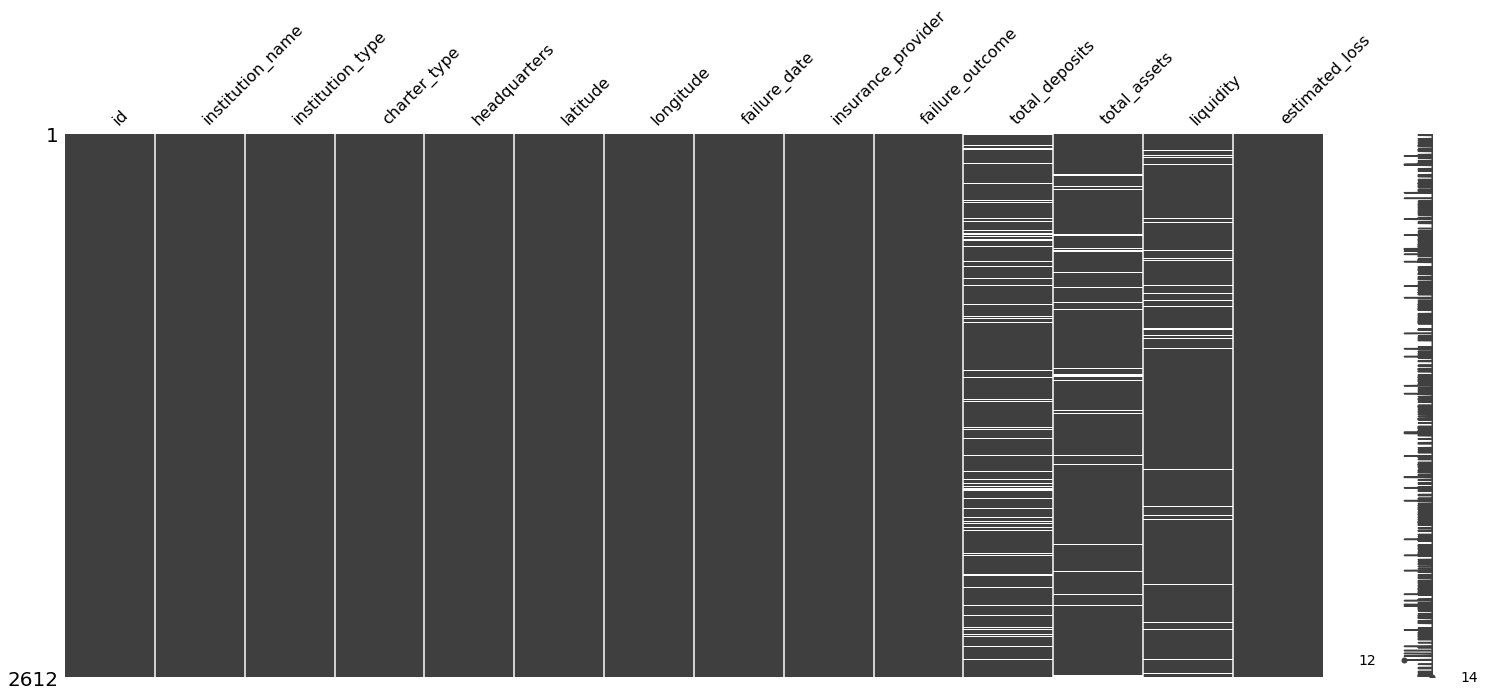

In [8]:
msno.matrix(data)

In [9]:
data['total_deposits'] = data['total_deposits'].transform(lambda x: x.fillna(x.median()))
data['total_assets'] = data['total_assets'].transform(lambda x: x.fillna(x.median()))
data['liquidity'] = data['liquidity'].transform(lambda x: x.fillna(x.median()))

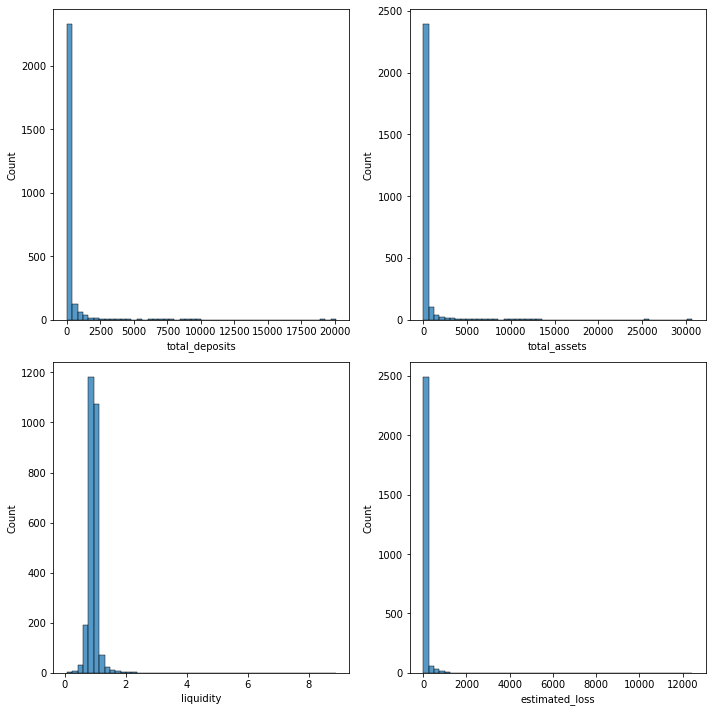

In [10]:
var_cont = ['total_deposits','total_assets','liquidity','estimated_loss'] # 'latitude','longitude',
fig,axs = plt.subplots(2,2,figsize=(10,10))
for i,col in enumerate(var_cont):
    sns.histplot(data[col],bins=50,ax=axs.ravel()[i])
#     sns.distplot(data[col],bins=50,ax=axs.ravel()[i])

#     print(col,':')
#     print(sum(data[col]==0),'\n')
fig.tight_layout()
plt.show()

/Users/vashishtha/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


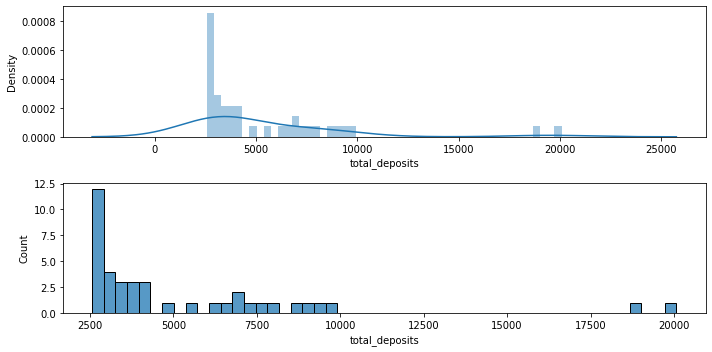

In [11]:
var_cont = ['total_deposits','total_assets','liquidity','estimated_loss']
col = var_cont[0]
thr = 2500
fig,axs = plt.subplots(2,1,figsize=(10,5))
sns.distplot(data[data[col]>thr][col],bins=50,ax=axs.ravel()[0])
sns.histplot(data[data[col]>thr][col],bins=50,ax=axs.ravel()[1])
fig.tight_layout()

In [12]:
var_cont = ['total_deposits','total_assets','liquidity','estimated_loss']
thr = [2500,5000,2,2000]
var_thr= [*zip(var_cont,thr)]
print(data.shape)
for itm in var_thr:
    data = data[data[itm[0]]<=itm[1]]
    print(data.shape)

(2612, 14)
(2572, 14)
(2570, 14)
(2564, 14)
(2563, 14)


/Users/vashishtha/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vashishtha/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vashishtha/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

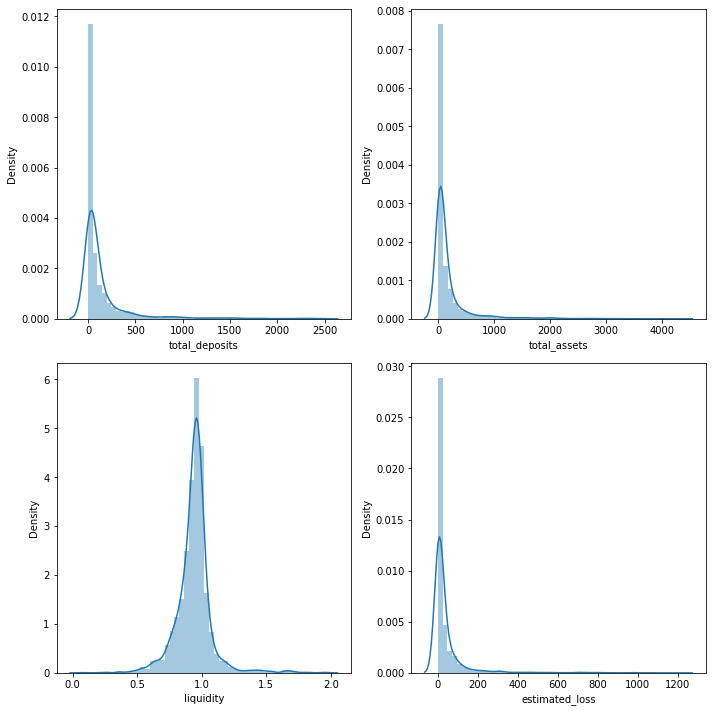

In [13]:
var_cont = ['total_deposits','total_assets','liquidity','estimated_loss'] # 'latitude','longitude',
fig,axs = plt.subplots(2,2,figsize=(10,10))
for i,col in enumerate(var_cont):
#     sns.histplot(data[col],bins=50,ax=axs.ravel()[i])
    sns.distplot(data[col],bins=50,ax=axs.ravel()[i])

#     print(col,':')
#     print(sum(data[col]==0),'\n')
fig.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

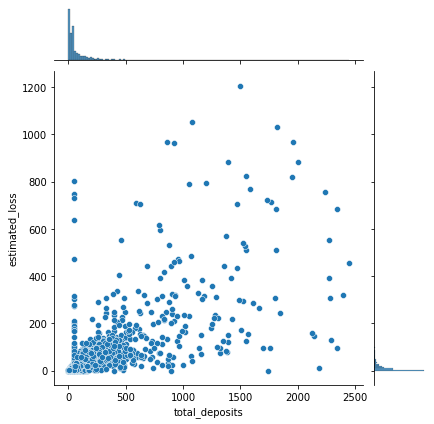

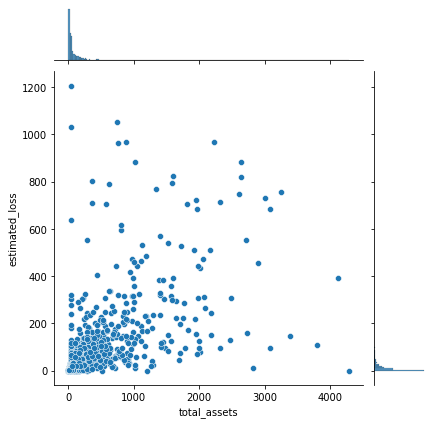

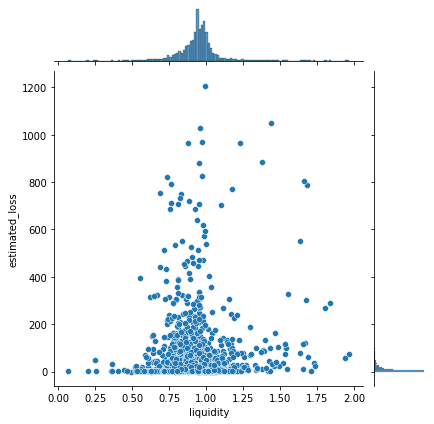

In [14]:
var_cont = ['total_deposits','total_assets','liquidity']#,'estimated_loss', 'latitude','longitude',
fig = plt.figure(figsize=(10,10))
for i,col in enumerate(var_cont):
    sns.jointplot(x=col, y='estimated_loss', data=data)

plt.show()

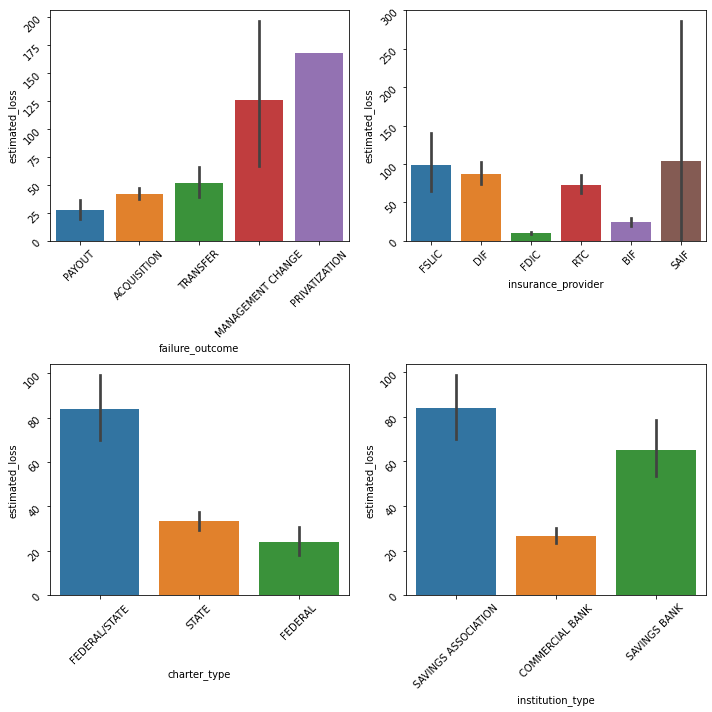

In [15]:
var_cat = ['failure_outcome','insurance_provider','charter_type','institution_type']
fig, axs = plt.subplots(2,2,figsize=(10,10))
for i,col in enumerate(var_cat):
    sns.barplot(x=col,y='estimated_loss', data=data, ax=axs.ravel()[i])
    axs.ravel()[i].tick_params(rotation=45)
fig.tight_layout()
plt.show()

<AxesSubplot:>

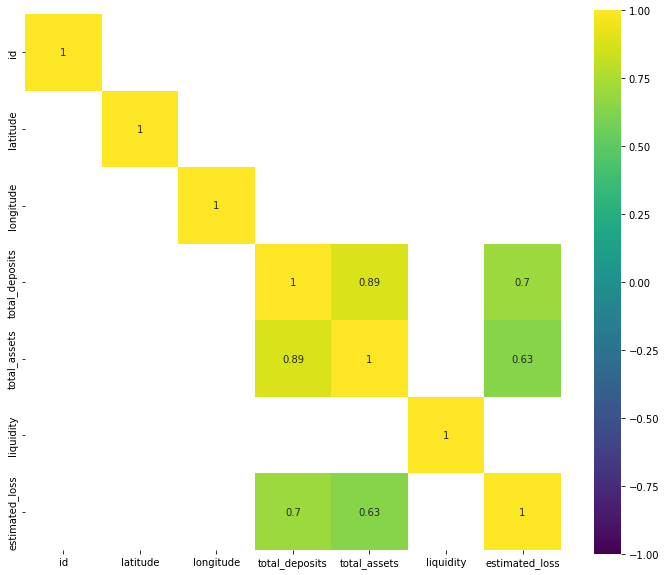

In [16]:
# Correlation heatmap
corr = data.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >0.3)|(corr<-0.3)],vmax=1,vmin=-1,annot=True,cmap='viridis',square=True)

In [17]:
data['failure_date'] = pd.to_datetime(data['failure_date'])
data['fail_year'] = data['failure_date'].dt.year
data.drop(columns=['id','failure_date'],inplace=True)

In [18]:
var_cat = ['failure_outcome','insurance_provider','charter_type','institution_type']
data = pd.get_dummies(data,columns=var_cat)

In [19]:
from sklearn.preprocessing import LabelEncoder
data['institution_name_cat'] = LabelEncoder().fit_transform(data['institution_name'])
data['headquarters_cat'] = LabelEncoder().fit_transform(data['headquarters'])
data.drop(columns=['institution_name','headquarters'],inplace=True)

In [25]:
if False:
    scale = StandardScaler()
    var_cont = ['total_deposits','total_assets','liquidity']
    for col in var_cont:
        scale.fit(data[col].values.reshape(-1,1))
        data[col + '_std'] = scale.transform(data[col].values.reshape(-1,1))

data.drop(columns=var_cont,inplace=True)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['estimated_loss']),data['estimated_loss'],test_size=0.2)

In [42]:
model = RandomForestRegressor()
clf = model.fit(X_train,y_train)
pred = clf.predict(X_test)

print(np.mean(abs(y_test-pred)/y_test))

28.12528127693733


<AxesSubplot:ylabel='variable'>

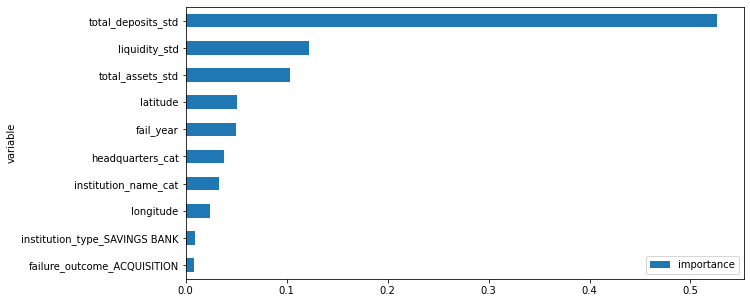

In [63]:
feat_imp = pd.DataFrame([*zip(X_train.columns, model.feature_importances_)])
feat_imp.rename(columns={0:'variable',1:'importance'},inplace=True)
feat_imp.sort_values(by='importance',inplace=True)
feat_imp.iloc[-10:].plot.barh(x='variable',figsize=(10,5))

In [56]:
feat_imp

,variable,importance
0,latitude,0.050756
1,longitude,0.024137
2,fail_year,0.049346
3,failure_outcome_ACQUISITION,0.008150
4,failure_outcome_MANAGEMENT CHANGE,0.006779
5,failure_outcome_PAYOUT,0.007345
6,failure_outcome_PRIVATIZATION,0.000161
7,failure_outcome_TRANSFER,0.001579
8,insurance_provider_BIF,0.000787
9,insurance_provider_DIF,0.001392
